In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

out = 'H:\\My Drive\\PROJECTS\\PSI 2022-2025\\caltarget paper\\figures\\'

In [2]:
# import
sc = pd.read_csv('SuperCam_pred_true_summary.csv').reset_index() # the index will be the sample label
sc['inst'] = 'SuperCam'
cc = pd.read_csv('ChemCam_pred_true_summary.csv').reset_index()
cc['inst'] = 'ChemCam'
cc.rename(columns={'Target':'target'}, inplace=True) # match to SC

# not exactly the same elements analyzed
cc_comps = [x.split('_')[0] for x in cc.columns if 'actual' in x]
sc_comps = [x.split('_')[0] for x in sc.columns if 'actual' in x]

print(cc_comps)
print(sc_comps)
print(set(cc_comps) - set(sc_comps))

comps = ['SiO2','TiO2','Al2O3','FeOT','MnO','MgO','CaO','Na2O','K2O']

# merge
df = pd.concat([sc,cc], ignore_index=True)

['Al2O3', 'CaO', 'FeOT', 'K2O', 'MgO', 'MnO', 'Na2O', 'SiO2', 'TiO2']
['Al2O3', 'CaO', 'FeOT', 'K2O', 'MgO', 'Na2O', 'SiO2', 'TiO2']
{'MnO'}


### Histogram comparing standard compositions

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

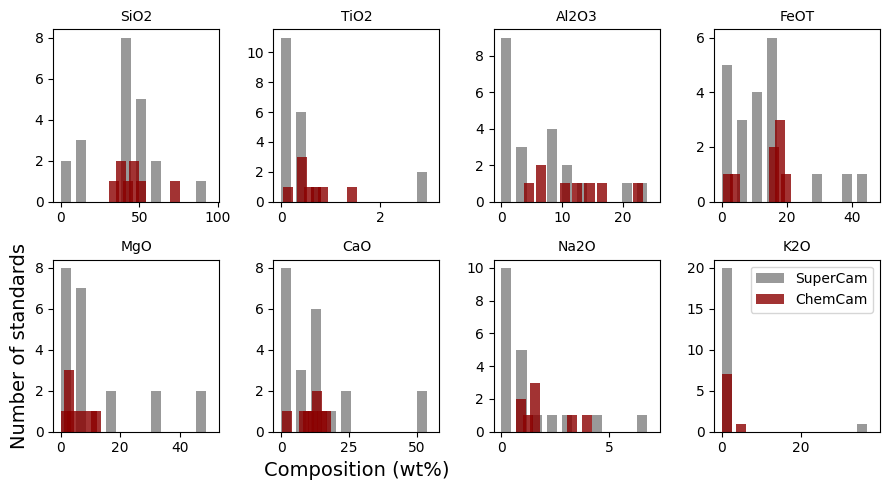

In [3]:
f1 = 14
f2=10

fig, ax = plt.subplots(nrows=2, 
                       ncols=4,
                       figsize=(9,5))

ys = [0,1,2,3,0,1,2,3]
xs = [0,0,0,0,1,1,1,1]
i = 0
comp_s = ['SiO2','TiO2','Al2O3','FeOT','MgO','CaO','Na2O','K2O']
for oxide in comp_s:
    col = f'{oxide}_actual'
    
    m1 = max(cc[col].values)
    w=m1/10
    if oxide != 'MnO':
        m2 = max(sc[col].values)
        m = max([m1,m2])
        w=m/15

    # SuperCam
    if oxide != 'MnO':
        ax[xs[i],ys[i]].hist(sc[col].dropna(), alpha=0.8, width=w, color='grey', label='SuperCam')
    
    # ChemCam
    ax[xs[i],ys[i]].hist(cc[col].dropna(), alpha=0.8, width=w, color='darkred', label='ChemCam')
    
    ax[xs[i],ys[i]].set_title(oxide, fontsize=f2)
    
    i+=1
    
ax[1,0].set_ylabel('Number of standards', fontsize=f1)
ax[1,1].set_xlabel('Composition (wt%)', fontsize=f1)

plt.legend()
plt.tight_layout()
plt.savefig(out+'composition_histogram.eps', dpi=600)
plt.show()

### Predicted vs. True overall for SC and CC
3x3 figure

In [4]:
# labels as target numbers
cc_key = pd.read_csv('ccct_key.csv', header=None, dtype=object)
sc_key = pd.read_excel('SCCT_key.xlsx', skiprows=3, header=None, dtype=object)
sc_key = sc_key[sc_key[0].isin(df.target)]

key = pd.concat([cc_key,sc_key[[0,3]].rename(columns={3:1})])
key = dict(zip(key[0],key[1]))

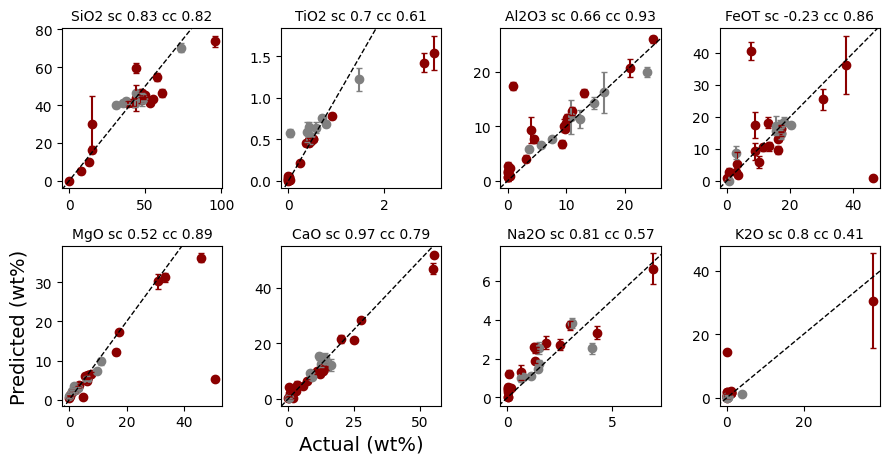

In [16]:
f1 = 14
f2=10

fig, ax = plt.subplots(nrows=2, 
                       ncols=4,
                       figsize=(9,4.75))

ys = [0,1,2,3,0,1,2,3]
xs = [0,0,0,0,1,1,1,1]
i = 0

for oxide in comp_s:
    pred = f'{oxide}_mean'
    std = f'{oxide}_std'
    true = f'{oxide}_actual'
    
    temp = df[(df[pred].notna())&(df[true].notna())].copy()
    
    # get R2
    cc_temp = temp[temp.inst=='ChemCam'].copy()
    cc_r2 = r2_score(cc_temp[true], cc_temp[pred])
#    cc_adj_r2 = 1 - (1-cc_r2)*(len(cc_temp[pred]) - 1) / (len(cc_temp[pred]) - (cc_temp.shape[1] - 1) - 1)
    
    sc_temp = temp[temp.inst=='SuperCam'].copy()
    sc_r2 = r2_score(sc_temp[true], sc_temp[pred])
#    sc_adj_r2 = 1 - (1-sc_r2)*(len(sc_temp[pred]) - 1) / (len(sc_temp[pred]) - (sc_temp.shape[1] - 1) - 1)

    ax[xs[i],ys[i]].scatter(sc_temp[true], sc_temp[pred], c='darkred', label='SuperCam')
    ax[xs[i],ys[i]].errorbar(sc_temp[true], sc_temp[pred], yerr=sc_temp[std], capsize=2, c='darkred', linestyle='')
    
    ax[xs[i],ys[i]].scatter(cc_temp[true], cc_temp[pred], c='grey', label='ChemCam')
    ax[xs[i],ys[i]].errorbar(cc_temp[true], cc_temp[pred], yerr=cc_temp[std], capsize=2, c='grey', linestyle='')
    
#    for row in temp.index:
#        c = 'darkred' if temp.loc[row]['inst'] == 'ChemCam' else 'grey'
#        label = key[temp.loc[row]['target']]
#        x = temp.loc[row][true]
#        y = temp.loc[row][pred]
        
#        ax[xs[i],ys[i]].annotate(label, (x,y), color=c, ha='center', va='center')
        
#    ax[xs[i],ys[i]].scatter(temp[true], temp[pred], marker='') # to make axes right
    
    # 1:1 line
    xmin, xmax = ax[xs[i],ys[i]].get_xlim()
    ymin, ymax = ax[xs[i],ys[i]].get_ylim()
    plt_min = min(ymin, xmin)
    plt_max = max(ymax, xmax)

    ax[xs[i],ys[i]].plot([plt_min,plt_max], [plt_min,plt_max], 'k--', linewidth=1)
    ax[xs[i],ys[i]].set_xlim(xmin,xmax)
    ax[xs[i],ys[i]].set_ylim(ymin,ymax)
    
    ax[xs[i],ys[i]].set_title(f'{oxide} sc {round(sc_r2,2)} cc {round(cc_r2,2)}', fontsize=f2)
    
    i+=1

    
ax[1,0].set_ylabel('Predicted (wt%)', fontsize=f1)
ax[1,1].set_xlabel('Actual (wt%)', fontsize=f1)

plt.tight_layout()
plt.savefig(out+'all_pred_true.eps', dpi=600)
plt.show()